In [1]:
import deep_predictor
from collections.abc import Mapping
import torch
import scanpy as sc
import seaborn as sns

Global seed set to 0
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [97]:
import scipy.stats as ss
import numpy as np
import scipy.stats as ss
sc.set_figure_params(dpi=250, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
import pandas as pd

In [98]:
import numpy as np
import pandas as pd

In [99]:
ic_data = sc.read("/home/gaurav/Gaurav/Berlin/Thesis/Paper/Hydra/Data/Objects/ic_hydra.h5ad")
ic_data.obs["cells"] = "Training data"

In [100]:
## Nematocyte_data = [28,14,12,13,10]
## Neurons_data = [37,22,16,18,24,20,21,23,17,19]
## Zymogen_data = [39,3,9,6,1,2]

In [172]:
segments = [3,9,6,1,2]
training_data = ic_data[ic_data.obs["segment"] == 39]
training_data = training_data[(training_data.obs["pseudotime"] < 0.25) & (training_data.obs["pseudotime"] > 0)]
for segment in segments : 
    segment_adata = ic_data[ic_data.obs["segment"] == segment]
    #segment_adata = segment_adata[segment_adata.obs["pseudotime"] > 0.5]
    training_data = training_data.concatenate(segment_adata)

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In 

In [173]:
training_data.obs["data"] = (training_data.obs["pseudotime"] > 0.3).astype('uint8') 

In [174]:
def balancing_segments(adata,key,max_cells):
    key_variable = np.unique(adata.obs[key])
    index_arr = []
    cell_numbers = np.arange(adata.shape[0])
    for cells in key_variable:
        bool_index = np.array(adata.obs[key] == cells)
        index_ = np.random.choice(cell_numbers[bool_index],max_cells) 		
        index_arr.append(index_)
    return np.concatenate(index_arr)

In [175]:
training_data = training_data[balancing_segments(training_data,"segment",200)]

In [211]:
zebra_obj = deep_predictor.DeepPredictor(training_data,latent_dim=100,hidden_layers=[800,800],workers=8,parameters=[0,0,1,0,1],likelihood="nb",batch_size=100)

In [212]:
zebra_obj.reload_model("/home/gaurav/Gaurav/Berlin/Thesis/Paper/Hydra/Data/Models/IC_gland_trained_ds.pt")

In [213]:
zebra_obj.runFlows(0,1,"data")

In [214]:
zebra_obj.trainFlows(iterations=100)

Loss (it. 0) : 23.027849
Loss (it. 10) : 22.610496
Loss (it. 20) : 21.691876
Loss (it. 30) : 20.134876
Loss (it. 40) : 18.052793
Loss (it. 50) : 15.705903
Loss (it. 60) : 13.347353
Loss (it. 70) : 11.244926
Loss (it. 80) : 9.255342
Loss (it. 90) : 7.259460


In [215]:
segments = [22,16,18,24,20,21,23,17,19]
#segments = [3,9,6,1,2]
#segments = [14,12,13,10]
test_subset = ic_data[ic_data.obs["segment"] == 37]
test_subset = test_subset[(test_subset.obs["pseudotime"] < 0.25) & (test_subset.obs["pseudotime"] > 0)]
for segment in segments : 
    segment_adata = ic_data[ic_data.obs["segment"] == segment]
    #segment_adata = segment_adata[segment_adata.obs["pseudotime"] > 0.3]
    test_subset = test_subset.concatenate(segment_adata)

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In 

In [216]:
test_subset.obs["data"] = (test_subset.obs["pseudotime"] > 0.25).astype('uint8') 

In [217]:
Test_data = test_subset[test_subset.obs["data"] == 0]
Test_data.obs["cells"] = "Test data"
Real_data = test_subset[test_subset.obs["data"] == 1]
Real_data.obs["cells"] = "Real data"

/tmp/ipykernel_23724/1608166135.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Test_data.obs["cells"] = "Test data"
/tmp/ipykernel_23724/1608166135.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Real_data.obs["cells"] = "Real data"


In [218]:
adata_test = Real_data.concatenate(Test_data)

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [219]:
adata_hydra_neuron_forward,px_scale,theta,px_rate = zebra_obj.predict(adata_test,0,1,"data")


/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



def corrfunc(x, y, **kws):
	slope, intercept, r, p_value, _err = stats.linregress(x, y)
	ax = plt.gca()
	ax.annotate("$R^2$ = {:.2f}".format(r**2),
				xy=(.7, .9), xycoords=ax.transAxes)


def Plotting_Correlation_genes(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.average(real_data.X,axis = 0),np.average(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    #major_ticks = np.arange(0, 100,20)
    #ax.set_xticks(major_ticks)
    #ax.set_yticks(major_ticks)
    #plt.xlim(0,80) 
    #plt.ylim(0,80)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)   
    plt.show()
    
def Plotting_Correlation_var(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.std(real_data.X,axis = 0),np.std(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    #major_ticks = np.arange(0, 40,5)
    #ax.set_xticks(major_ticks)
    #ax.set_yticks(major_ticks)
    sns.despine(offset=2)
    #plt.xlim(-1,25) 
    #plt.ylim(-1,25)
    plt.grid(False)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)
    plt.show()

In [221]:
pca_pal = ["#d62728","#ff7f0e","#1f77b4"]

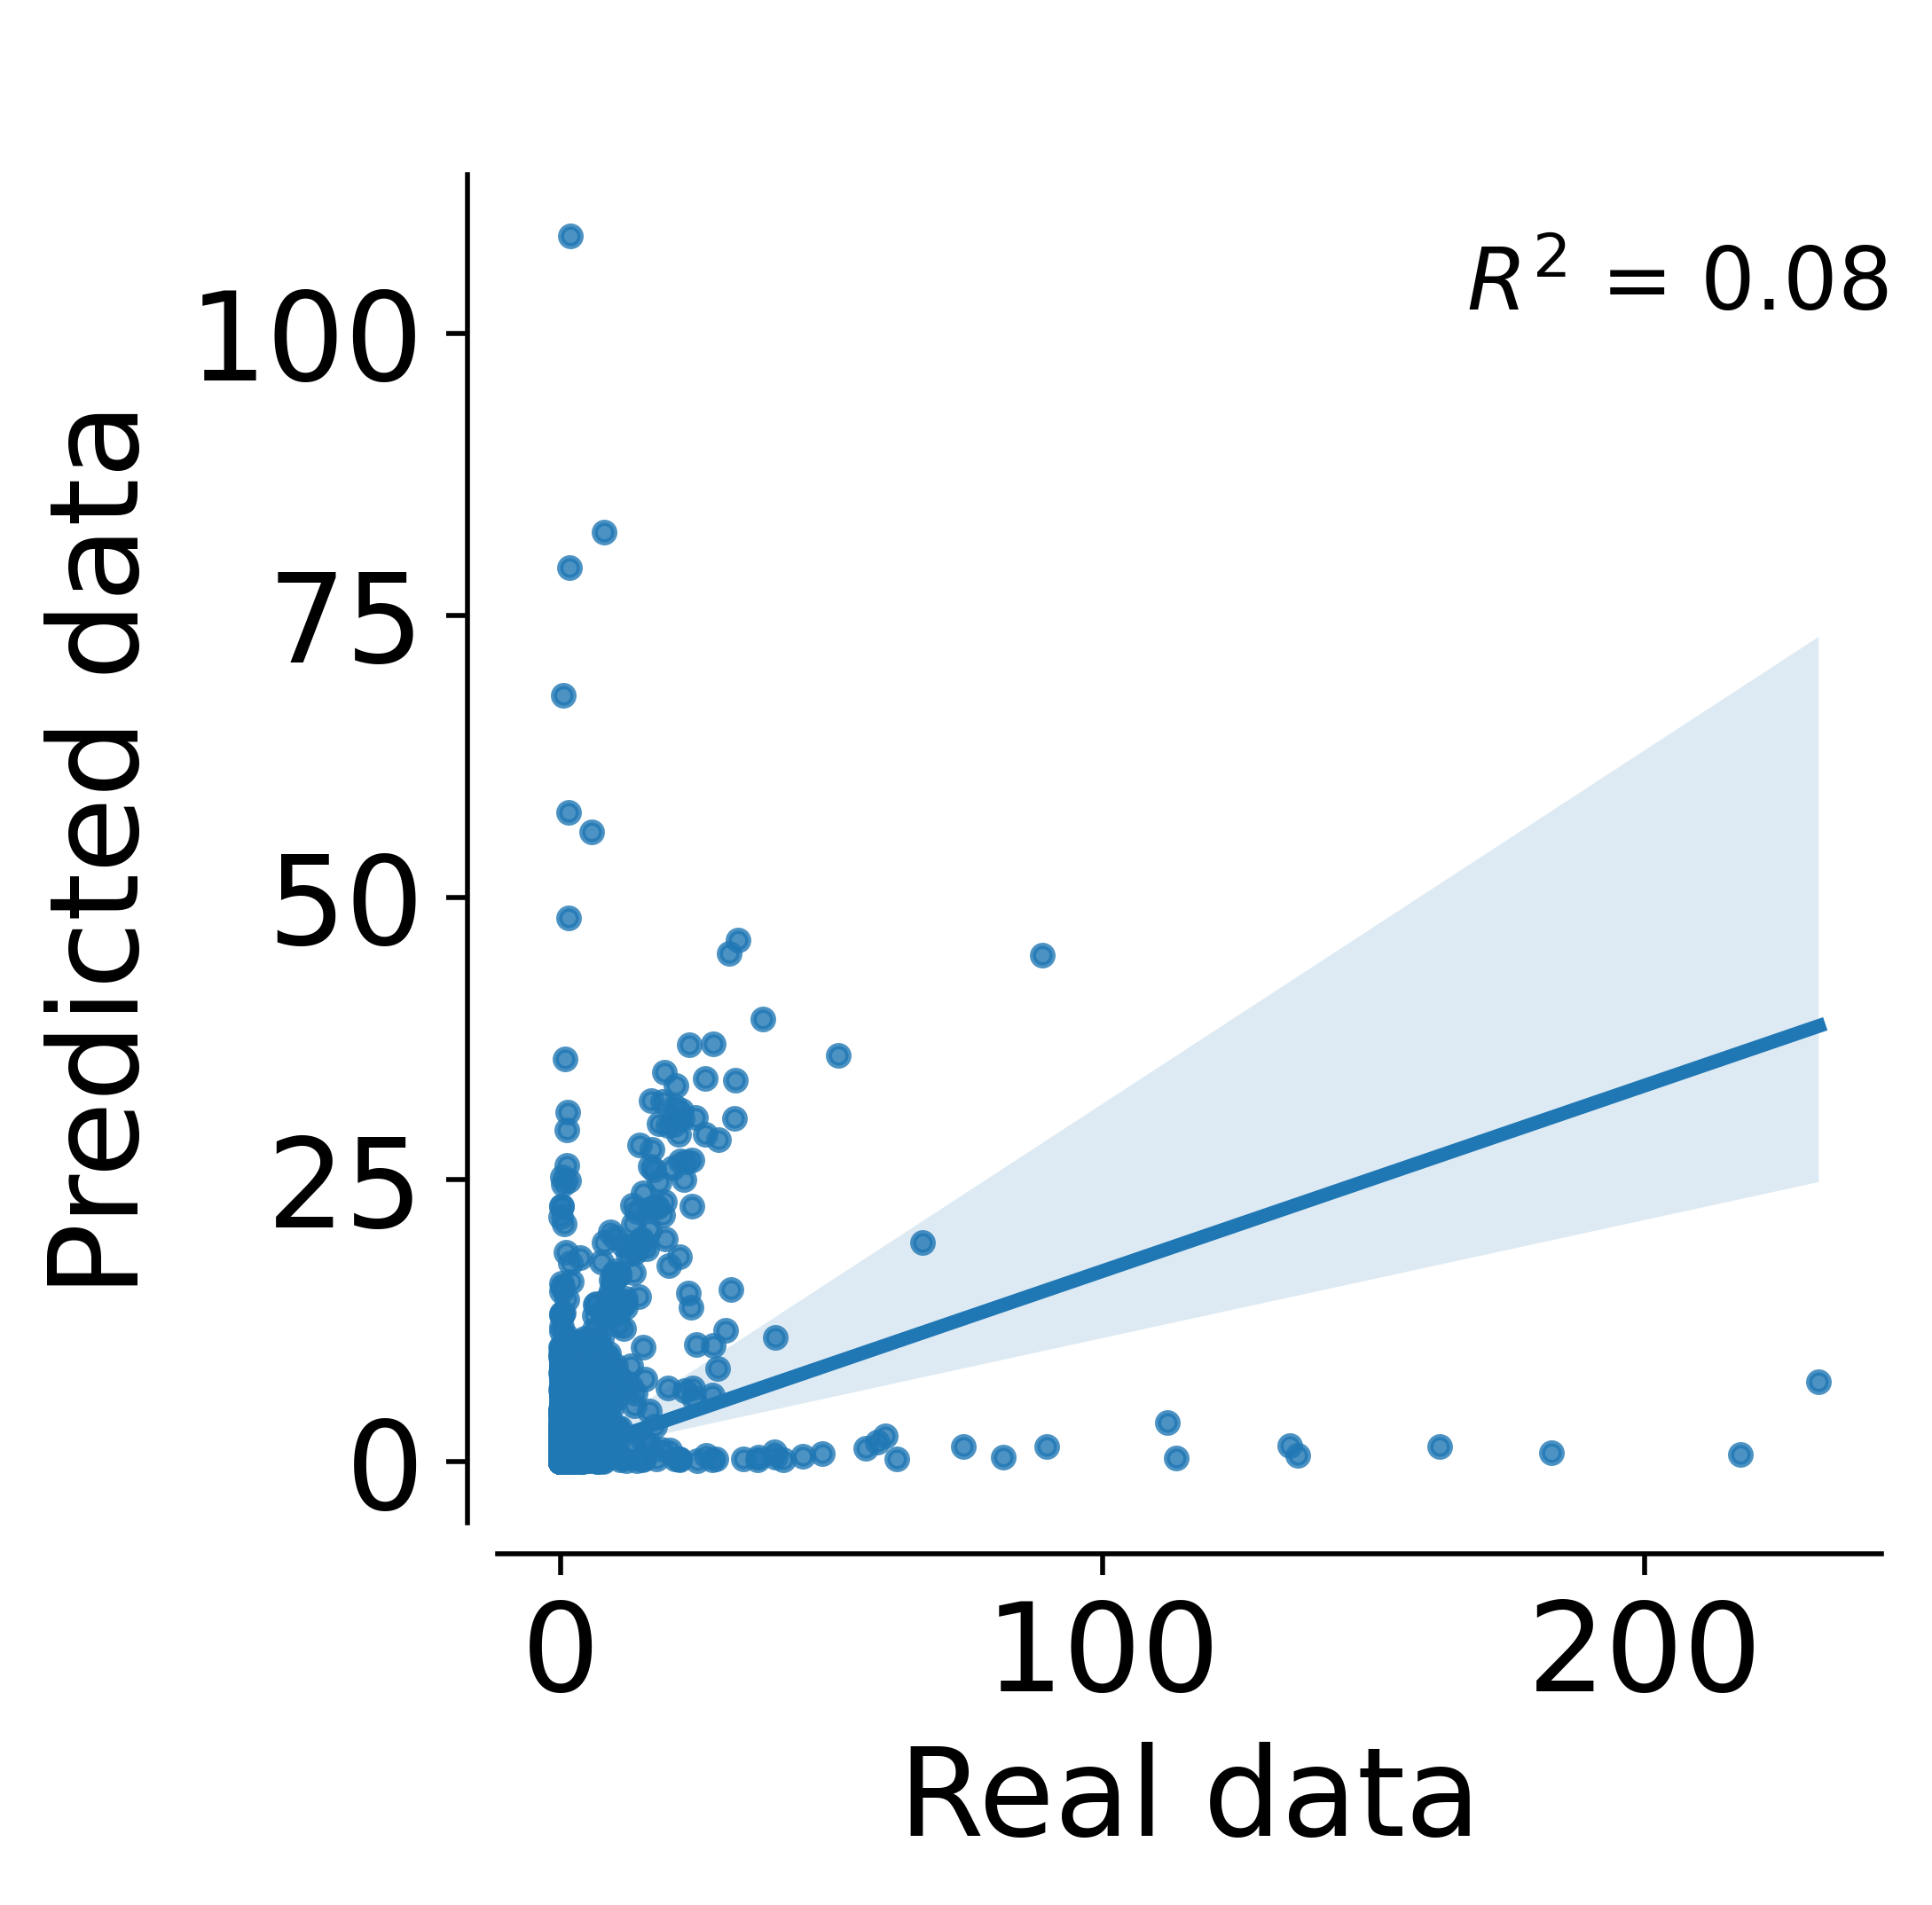

In [222]:
Plotting_Correlation_genes(adata_hydra_neuron_forward," ",pca_pal[2])


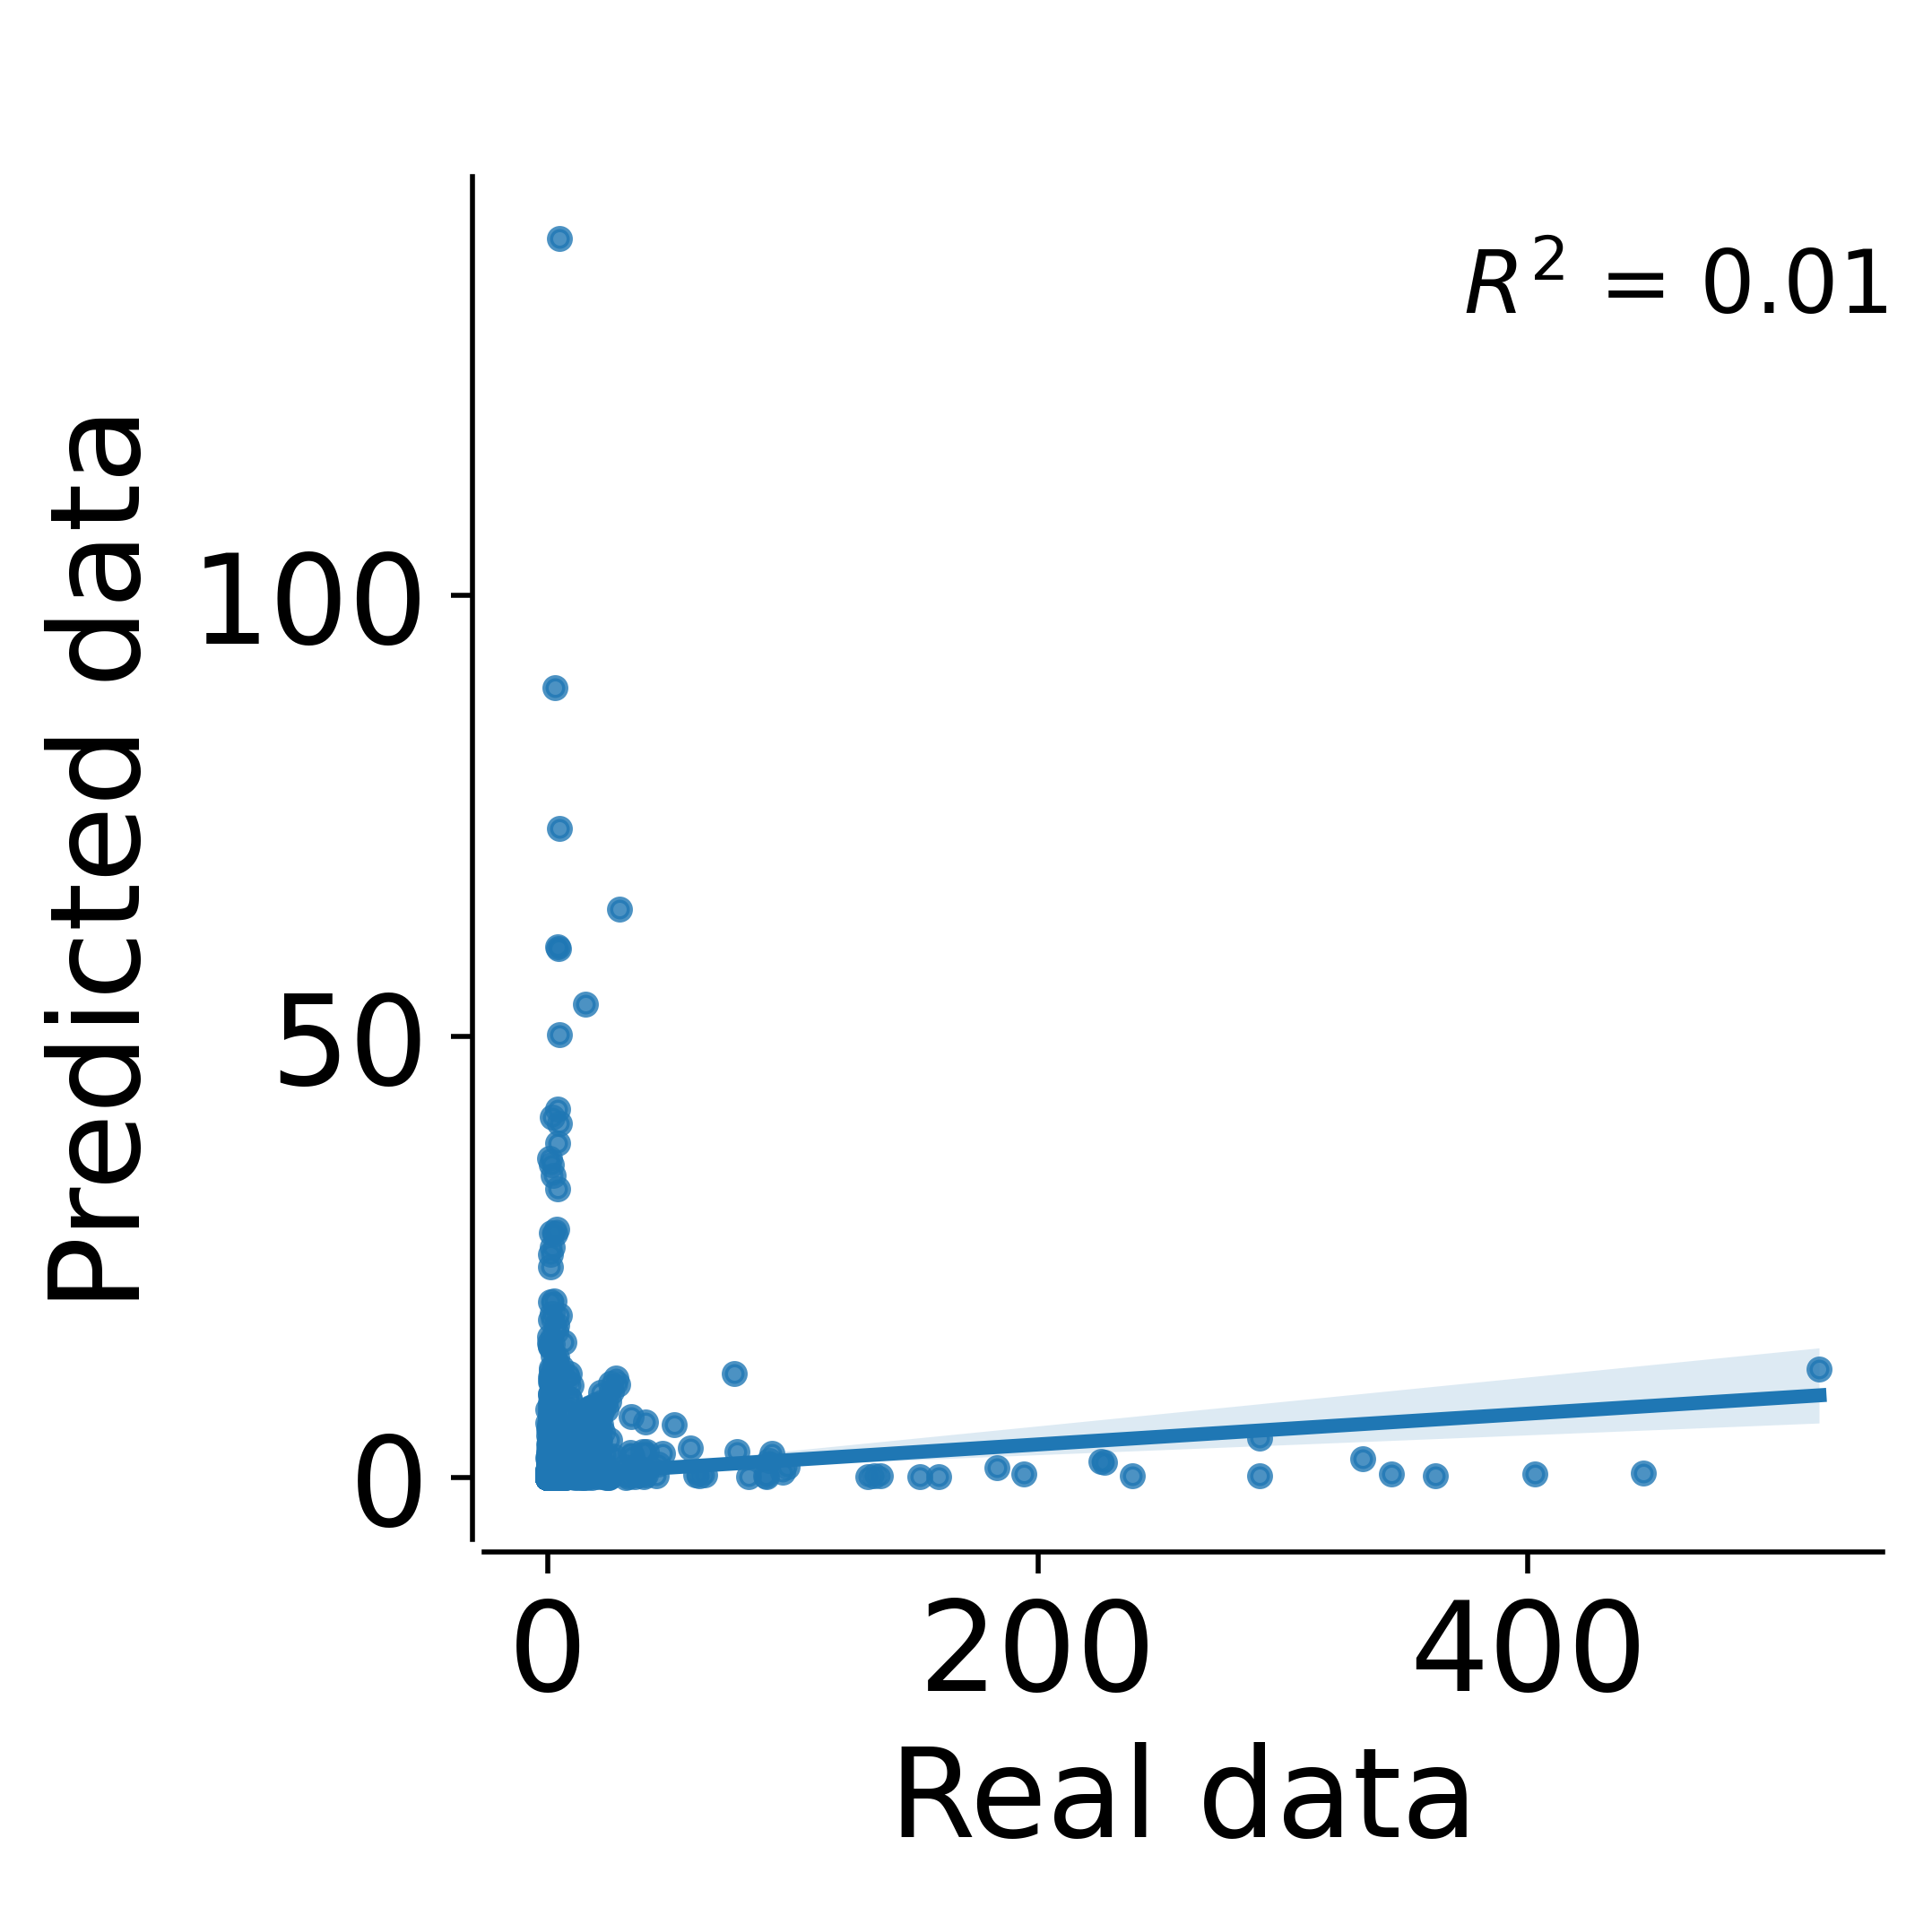

In [223]:
Plotting_Correlation_var(adata_hydra_neuron_forward," ",pca_pal[2])


In [224]:
def Calculating_PCA(data_object):
	sc.tl.pca(data_object)
    
pca_pal_ = ["#1f77b4","grey","darkgrey"]

In [225]:
Calculating_PCA(adata_hydra_neuron_forward)


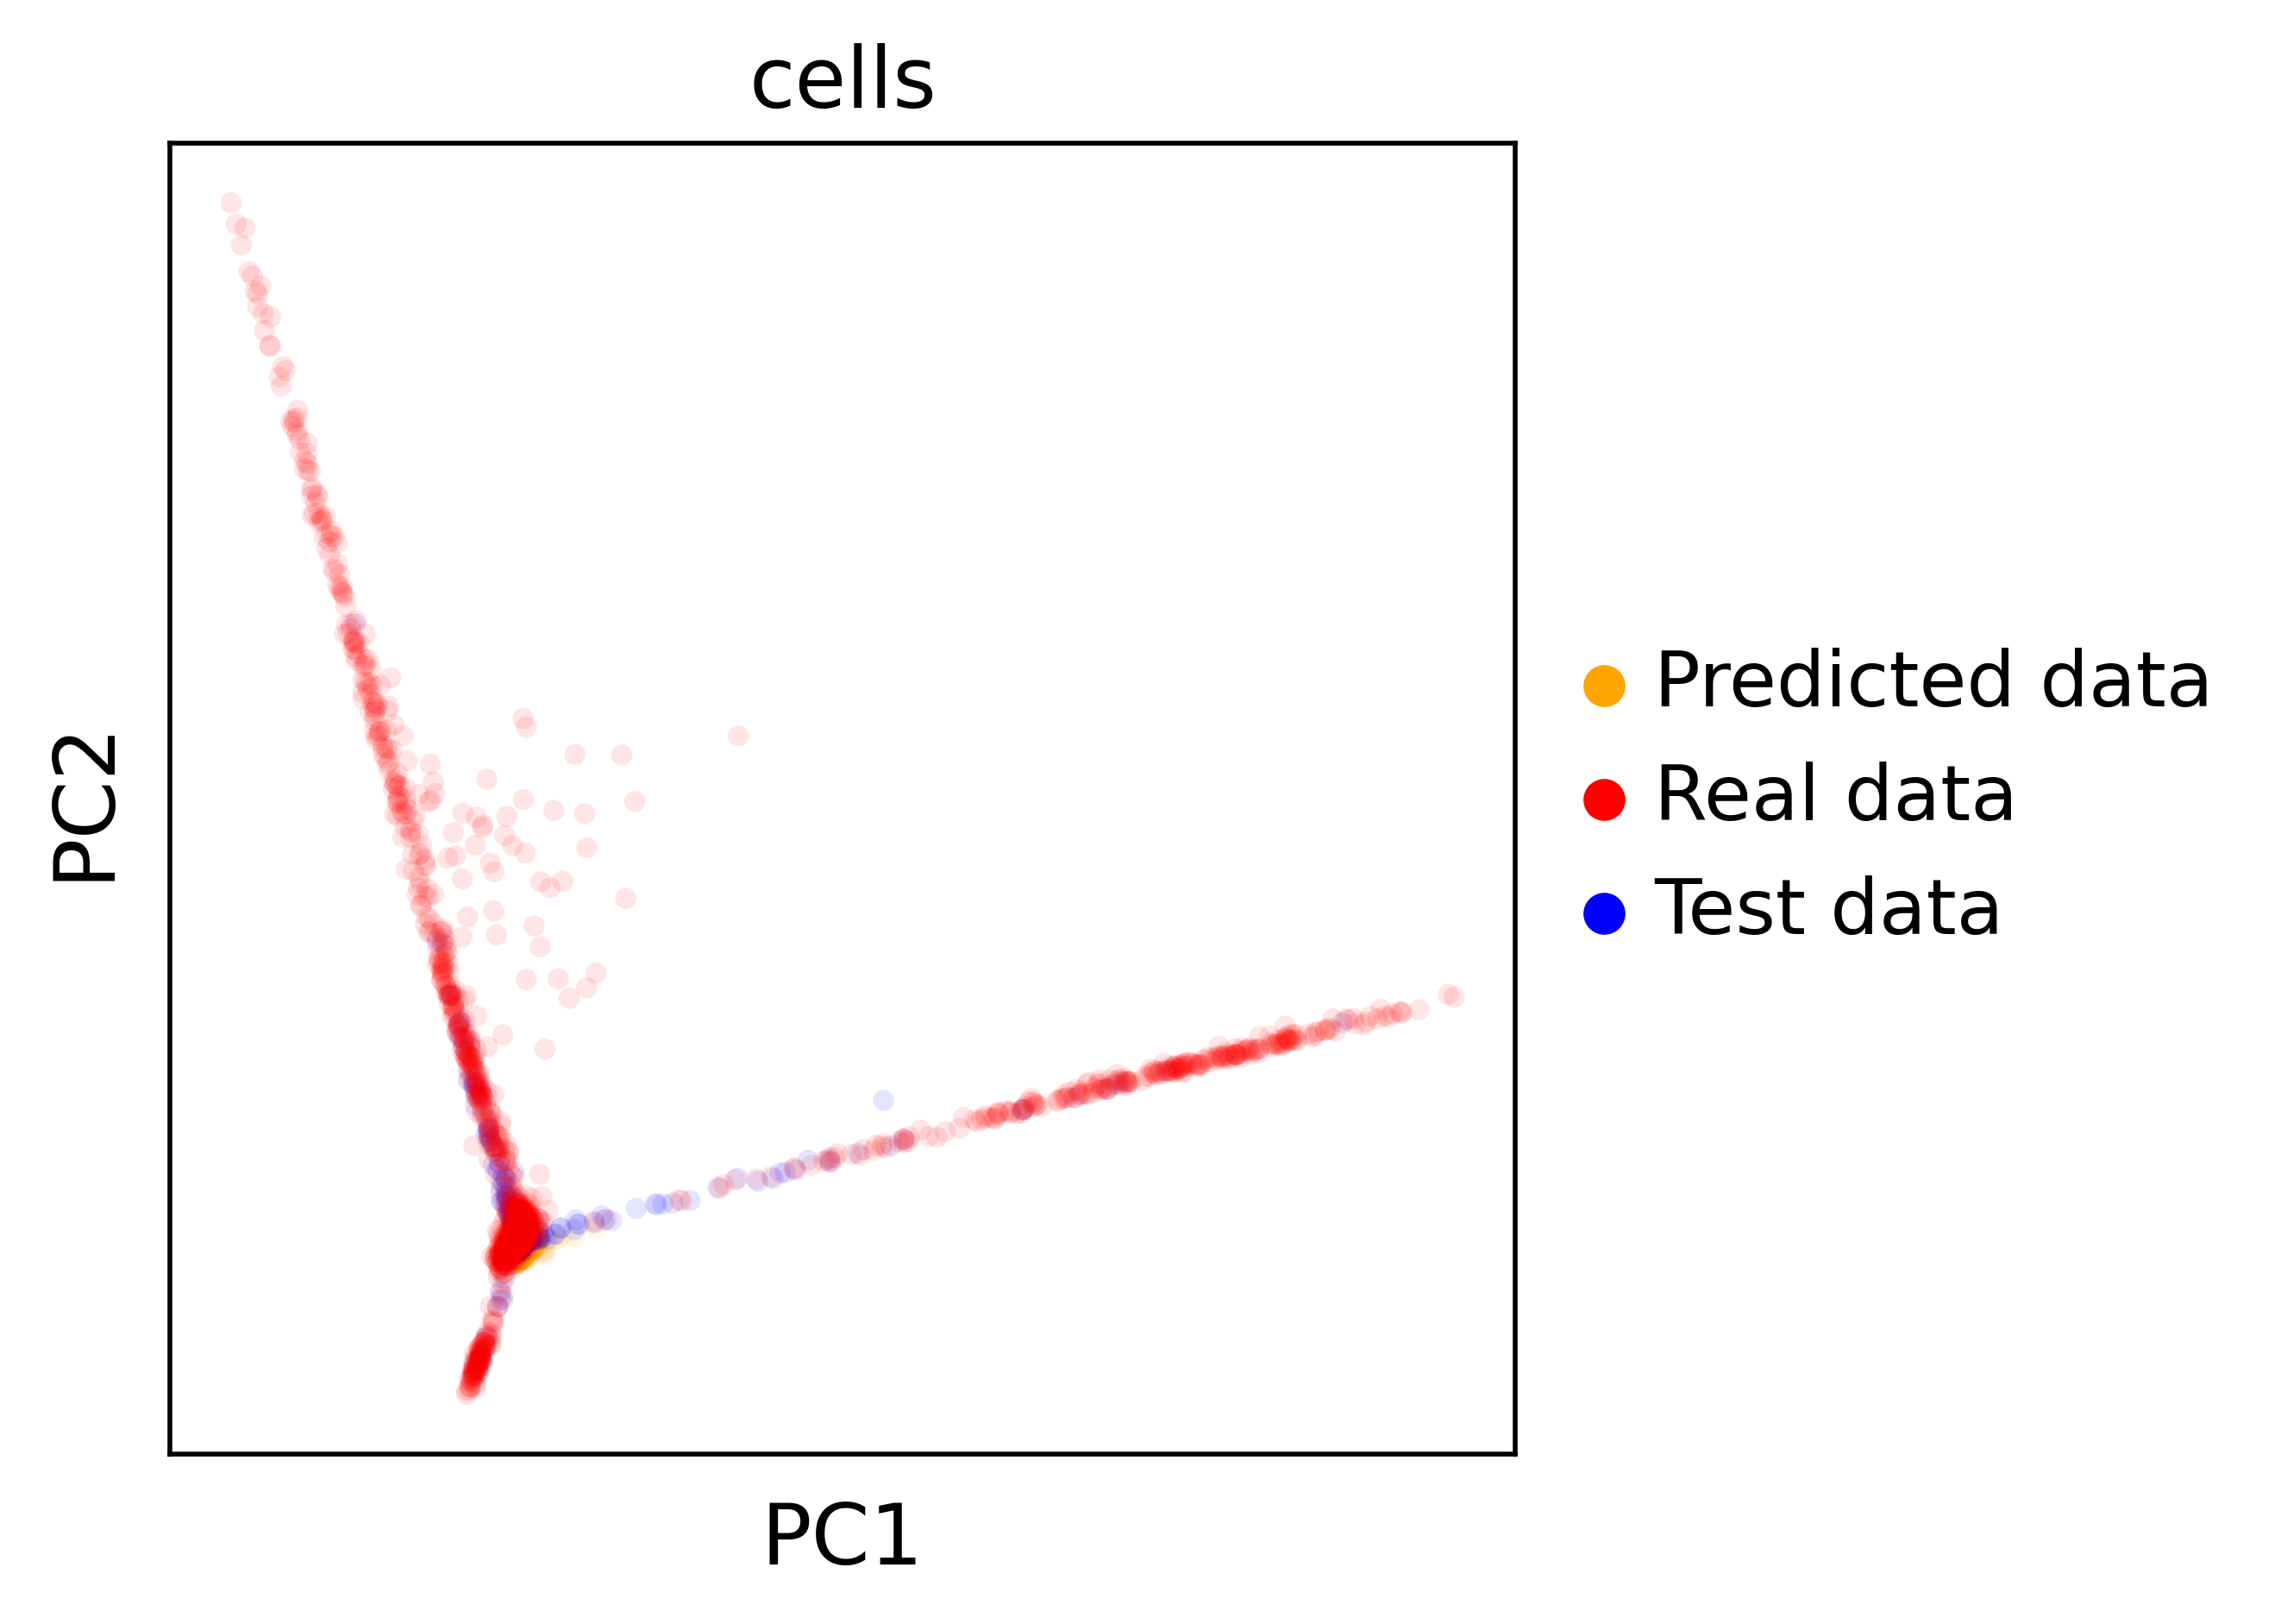

In [226]:
sc.pl.pca(adata_hydra_neuron_forward, color="cells",size=50,alpha = 0.1,palette=["orange","red","blue"])

In [227]:
sc.tl.tsne(adata_hydra_neuron_forward)

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


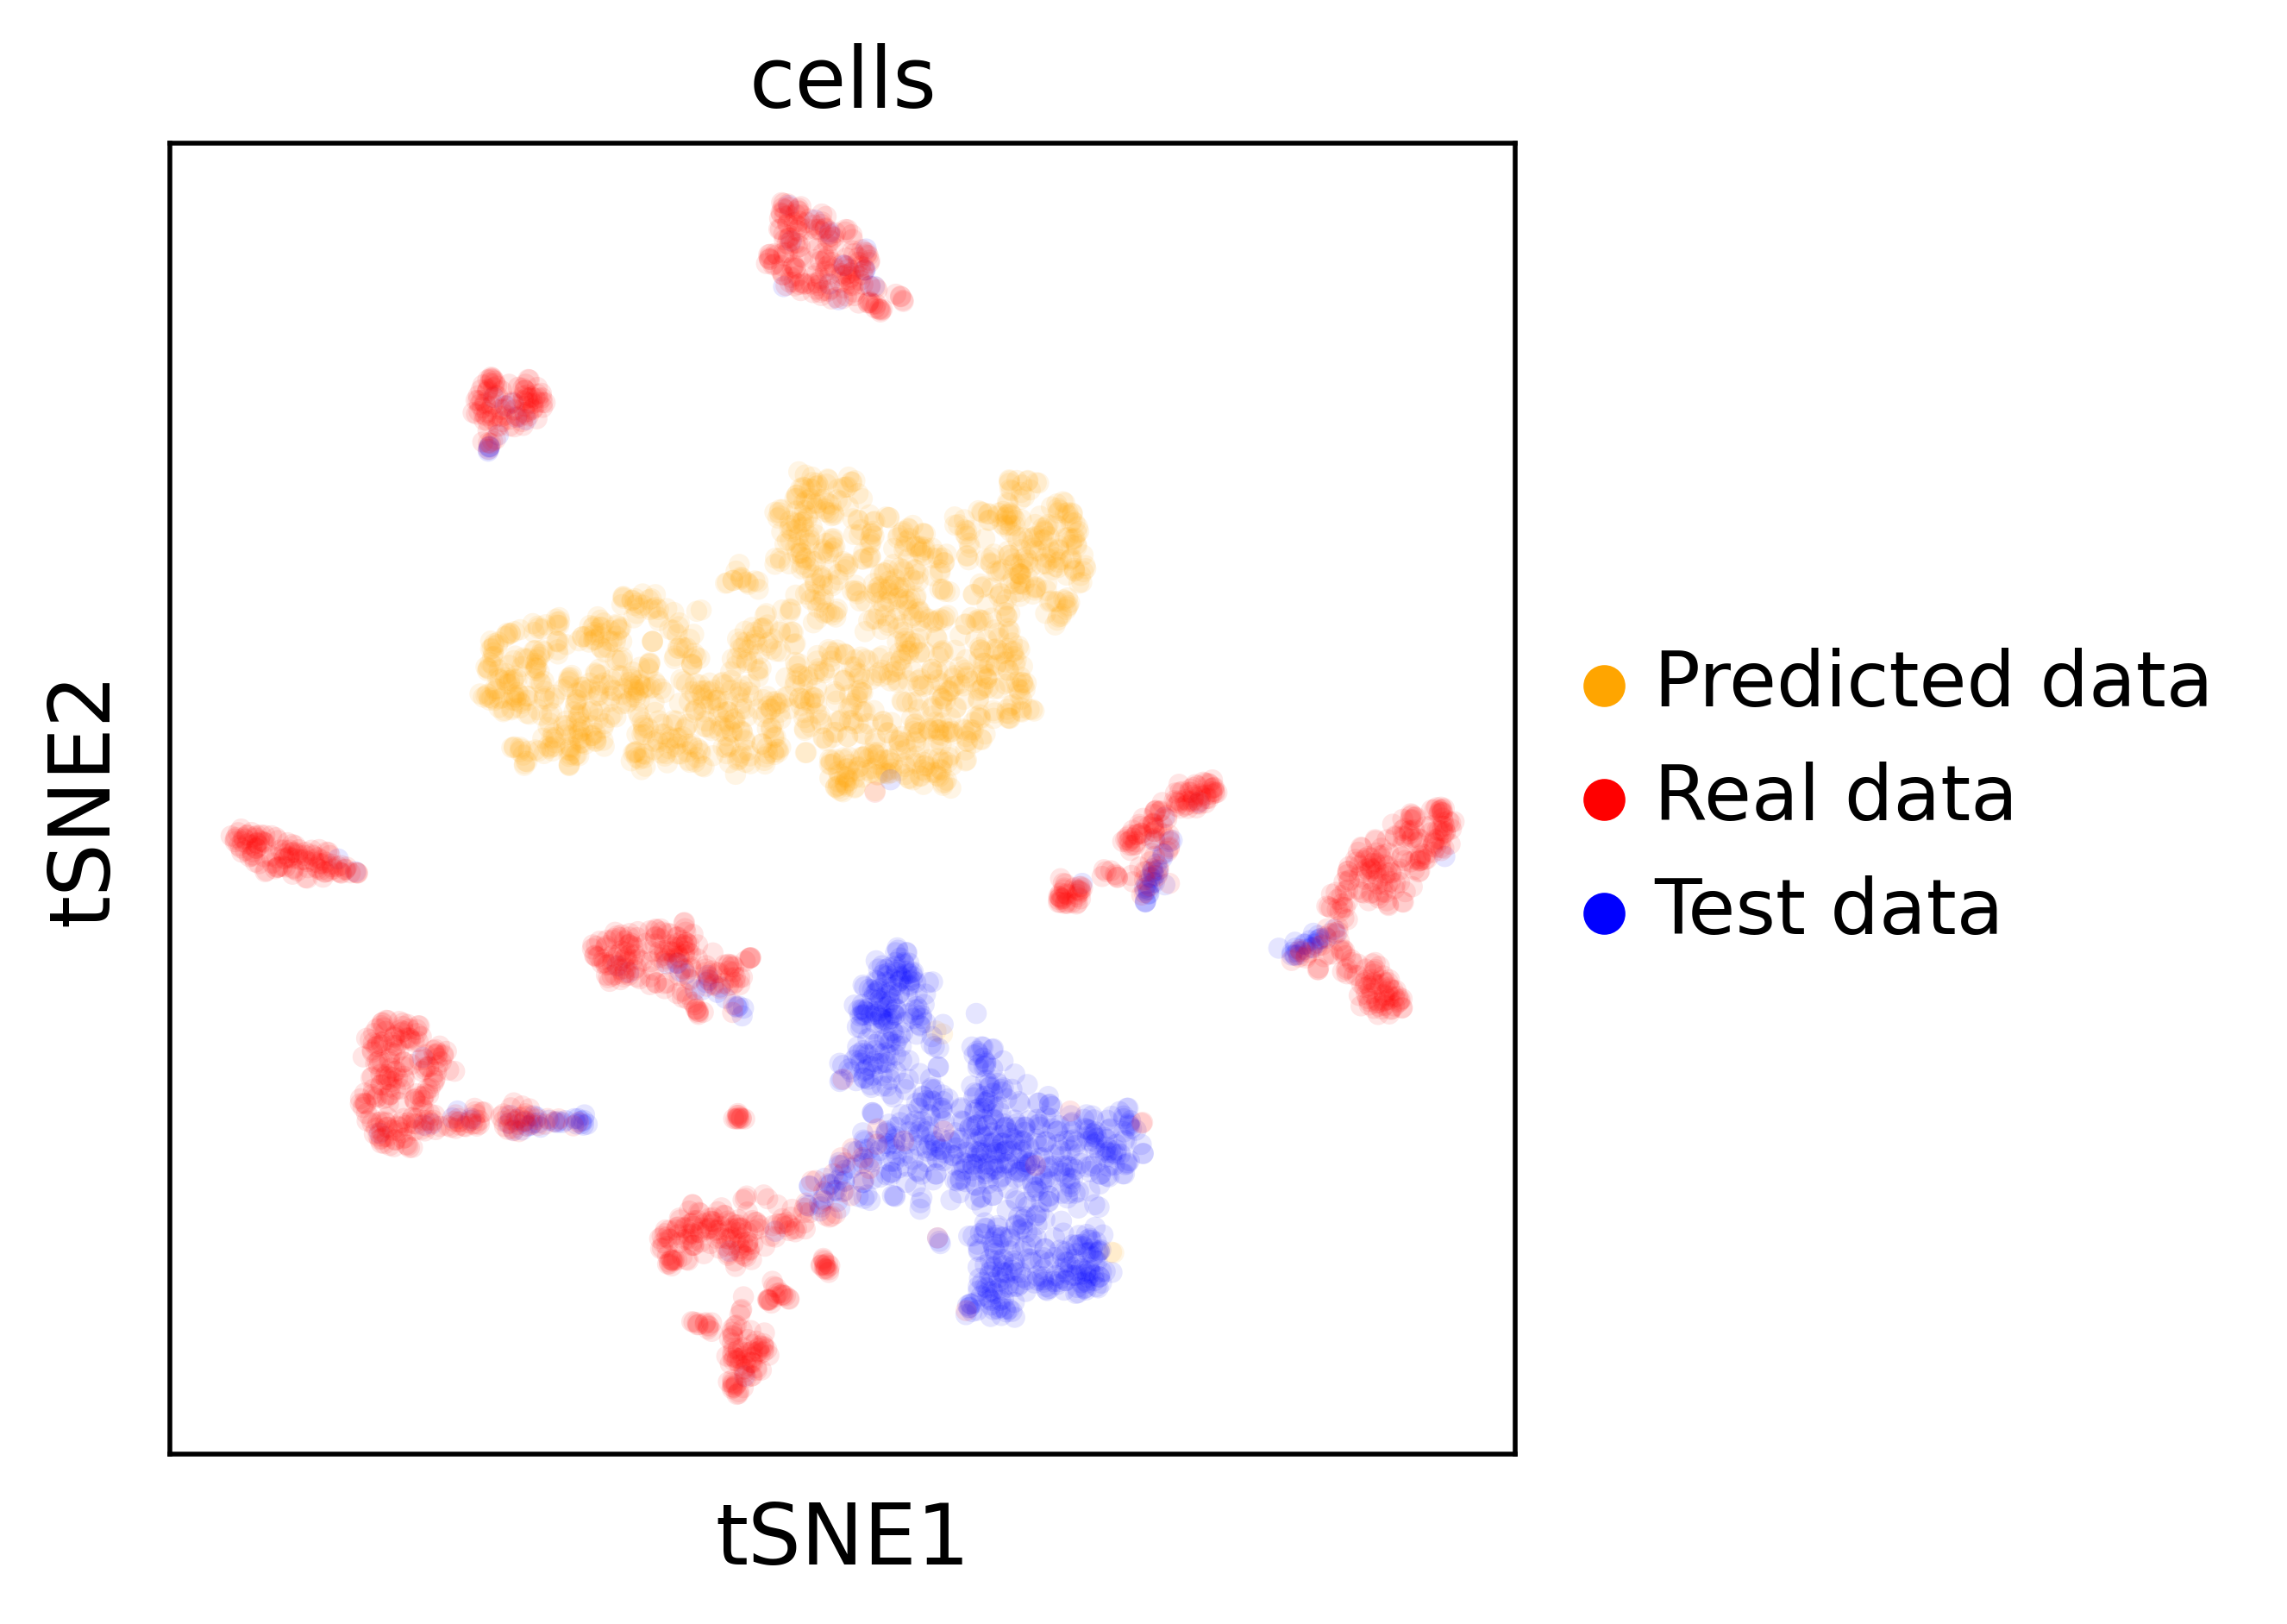

In [228]:
sc.pl.tsne(adata_hydra_neuron_forward, color="cells",size=50,alpha = 0.1,palette=["orange","red","blue"])